In [8]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

import torch
import torch.nn as nn
import torch.optim as optim

<p style='font-size:18px; line-height:2.5em'> We will solve a regression problem using neural network.
    
<p style='font-size:18px; line-height:2.5em'> Data is generated from \begin{equation}y=\sin(x) + \epsilon, \end{equation} where $\epsilon \sim N(0, 0.1)$ denotes a random noise.

# Dataset generation

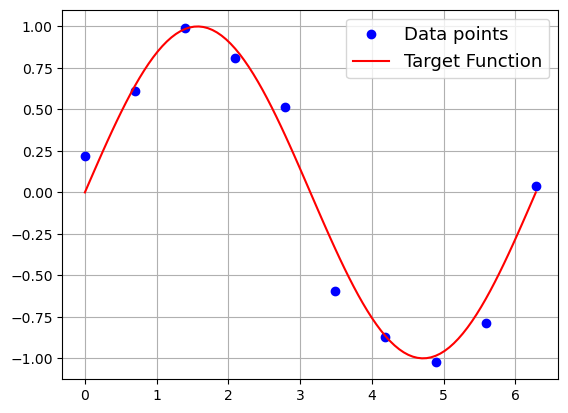

In [12]:
N = 10                                                 # Number of samples
x = torch.linspace(0, 2*np.pi, N).view(-1,1)           # Input data
y = torch.sin(x) + torch.normal(0, 0.1, size=(N,1))    # Target data

plt.plot(x, y, 'bo', label='Data points')
plt.plot(np.linspace(0,2*np.pi,100), np.sin(np.linspace(0,2*np.pi,100)), 'r', label='Target Function')
plt.legend(fontsize=13)
plt.grid(True)
plt.show()

# Neural Network

In [18]:
# Build a neural network

class model(nn.Module) :
    def __init__(self) :
        super(model, self).__init__()
        self.layer1 = nn.Linear(1,8) # in_dim = 1, 1st hidden layer dim = 8
        self.layer2 = nn.Linear(8,8) # 1st_h_dim = 8, 2nd_h_dim = 8
        self.layer3 = nn.Linear(8,1) # 2nd_h_dim = 8, out_dim = 1
        #nn.init.xavier_uniform_(layer.weight)        # Optional: initial weights from Unif(?,?)
        self.act = nn.Tanh()                             # Nonlinear activation function, nn.ELU, nn.Sigmoid,.....

    def forward(self, x) :
        x = self.layer1(x)
        nn.Dropout(0.2)
        x = self.act(x) # #step by step
        nn.Dropout(0.1)
        x = self.act(self.layer2(x)) # We can simulataneoulsy define the nodes in the second layer
        x = self.layer3(x)
        return x

In [19]:
model()

model(
  (layer1): Linear(in_features=1, out_features=8, bias=True)
  (layer2): Linear(in_features=8, out_features=8, bias=True)
  (layer3): Linear(in_features=8, out_features=1, bias=True)
  (act): Tanh()
)

# Loss function, Optimizer

In [20]:
# Prepare for training

network = model()   # Pass the network to GPU if available

loss_f = nn.MSELoss()                                 # Mean Square Error loss function
optimizer = optim.Adam(network.parameters(), lr=1e-2)  # Momnent-based optimizer
EPOCHS = 30000                                        # Number of Training Iterations

# Training

In [21]:
# Train
loss_list = []
#network.train()  # Not necessary in this nn structure (enabling layers (such as Dropout or BatchNorm ...))

for i in range(1, EPOCHS+1) :
    optimizer.zero_grad()
    output = network(x)
    loss = loss_f(output, y)
    loss.backward()
    optimizer.step()

    loss_list.append(loss.item())
    if not i % 1000 :
        print('EPOCH : %6d/%6d | Loss : %8.7f ' %(i, EPOCHS, loss.item()))

print('Training Finished.')

EPOCH :   1000/ 30000 | Loss : 0.0000235 
EPOCH :   2000/ 30000 | Loss : 0.0000000 
EPOCH :   3000/ 30000 | Loss : 0.0000000 
EPOCH :   4000/ 30000 | Loss : 0.0000000 
EPOCH :   5000/ 30000 | Loss : 0.0000602 
EPOCH :   6000/ 30000 | Loss : 0.0000305 
EPOCH :   7000/ 30000 | Loss : 0.0000000 
EPOCH :   8000/ 30000 | Loss : 0.0000062 
EPOCH :   9000/ 30000 | Loss : 0.0000003 
EPOCH :  10000/ 30000 | Loss : 0.0000032 
EPOCH :  11000/ 30000 | Loss : 0.0000000 
EPOCH :  12000/ 30000 | Loss : 0.0000001 
EPOCH :  13000/ 30000 | Loss : 0.0000000 
EPOCH :  14000/ 30000 | Loss : 0.0000000 
EPOCH :  15000/ 30000 | Loss : 0.0000007 
EPOCH :  16000/ 30000 | Loss : 0.0000034 
EPOCH :  17000/ 30000 | Loss : 0.0000031 
EPOCH :  18000/ 30000 | Loss : 0.0000000 
EPOCH :  19000/ 30000 | Loss : 0.0000013 
EPOCH :  20000/ 30000 | Loss : 0.0000000 
EPOCH :  21000/ 30000 | Loss : 0.0000639 
EPOCH :  22000/ 30000 | Loss : 0.0000024 
EPOCH :  23000/ 30000 | Loss : 0.0000035 
EPOCH :  24000/ 30000 | Loss : 0.0

# Results

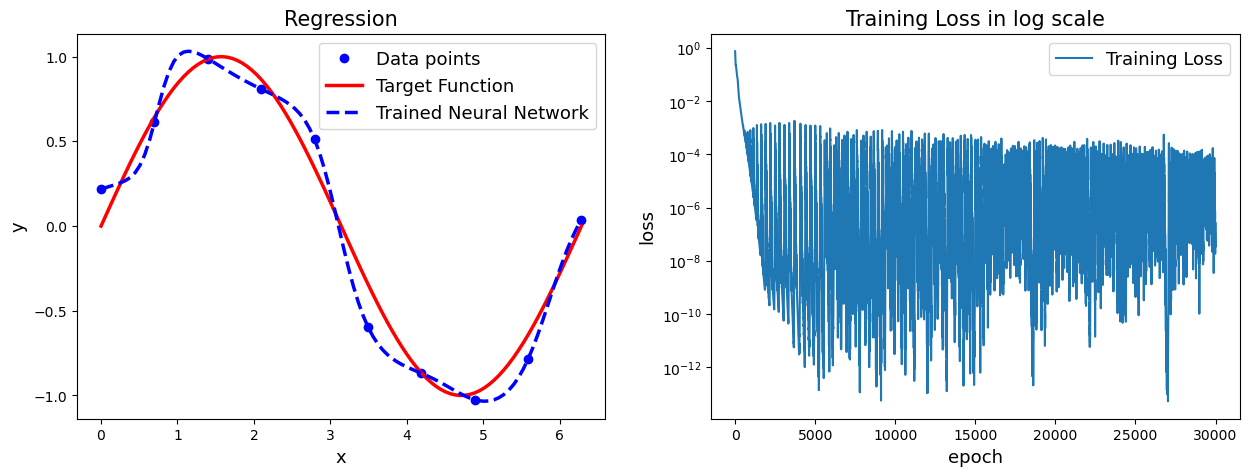

In [17]:
figure = plt.figure(figsize=(15,5))
ax1 = figure.add_subplot(1,2,1)
network.eval()
xx = np.linspace(0, np.pi*2, 100).reshape(-1,1)
yy = np.sin(xx)
ax1.plot(x, y, 'bo', label='Data points')
ax1.plot(xx, yy, color='r', linestyle='-', lw=2.5, label='Target Function')
ax1.plot(xx, network(torch.FloatTensor(xx)).detach().numpy(), color='b', linestyle='--', lw=2.5, label='Trained Neural Network')
ax1.legend(fontsize=13)
ax1.set_title('Regression', fontsize=15)
ax1.set_xlabel('x', fontsize=13)
ax1.set_ylabel('y', fontsize=13)

ax2 = figure.add_subplot(1,2,2,)
ax2.plot(loss_list, label='Training Loss')
ax2.set_yscale('log')
ax2.set_title('Training Loss in log scale', fontsize=15)
ax2.legend(fontsize=13)
ax2.set_xlabel('epoch', fontsize=13)
ax2.set_ylabel('loss', fontsize=13)
plt.savefig('regression', dpi=100)